# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

explanation:

---


1. **Importing Libraries:**
```
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
```

  * numpy (np): A fundamental package for numerical computations in Python, providing support for arrays and mathematical functions.
  * pandas (pd): A powerful data manipulation and analysis library, offering data structures like DataFrames.
  * fetch_lfw_people: A function from scikit-learn to load the "Labeled Faces in the Wild" dataset, which contains images of faces for machine learning tasks.
  * train_test_split: A utility to split the dataset into training and testing subsets.
  * SVC: Support Vector Classifier from scikit-learn, used for classification tasks.
  * confusion_matrix, accuracy_score, classification_report: Metrics from scikit-learn to evaluate the performance of classification models.
  * matplotlib.pyplot (plt): A plotting library for creating static, animated, and interactive visualizations in Python.
  * seaborn (sns): A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative graphics.

2. **Suppressing Warnings:**
```
import warnings
warnings.filterwarnings('ignore')
```

  * warnings: A built-in Python module to handle warning messages.
  * filterwarnings('ignore'): This line suppresses all warning messages, ensuring that the output remains clean without unnecessary warnings.

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=100, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 5
Data dimension: (1140, 62, 47, 3)
Images flatten dimension: (1140, 8742)


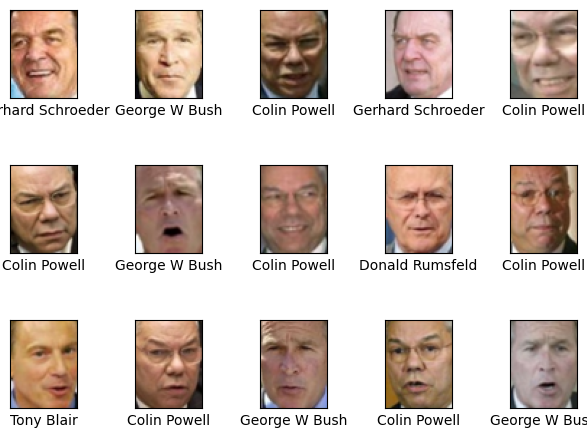

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

explanation:


---

1. **Loading the Dataset:**
```
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=100, color=True)
```
  * fetch_lfw_people: This function fetches the "Labeled Faces in the Wild" (LFW) dataset.
  * Parameters:
    * min_faces_per_person=100: Only includes individuals with at least 100 images in the dataset. This ensures that each class (person) has a sufficient number of samples for training and evaluation.
    * color=True: Loads the images in color instead of grayscale.
2. **Checking the Loaded Data:**
```
# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')
```
  * faces.target_names: Contains the names of the individuals (labels) in the dataset.
  * faces.images.shape: Shows the shape of the images array, typically in the format (n_samples, height, width, 3) when color=True, where 3 represents the RGB channels.
  * faces.data.shape: Provides the shape of the flattened image data, usually (n_samples, height * width * 3).
3. **Visualizing Random Images:**
```
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]
```
```
fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])
```

  * Generating Random Indices:
    * rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]: Creates a list of 15 random indices corresponding to images in the dataset.
  * Creating Subplots:
    * fig, ax = plt.subplots(3, 5): Creates a figure with a 3x5 grid of subplots to display 15 images.
    * fig.tight_layout(): Adjusts subplot parameters to give specified padding, ensuring that subplots fit nicely without overlapping.
  * Displaying Images:
    * The for loop iterates over each subplot axis and the corresponding random index.
    * axi.imshow(faces.images[rand_labels[i]], cmap='bone'): Displays the image in grayscale (cmap='bone'). If color=True, you might want to remove cmap='bone' to display in color.
    * axi.set(...): Removes the x and y ticks for a cleaner look and sets the label below each image to the corresponding person's name.


# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

# Features Extraction

1. **Importing Necessary Libraries**
```
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import cv2
```

  * numpy (np): Fundamental package for numerical operations.
  * scikit-learn modules: For machine learning tasks like splitting data, building classifiers, scaling features, and hyperparameter tuning.
  * cv2 (OpenCV): Open-source computer vision library used here for extracting SIFT features.

2. Generating Histogram Features
```
def generate_hist(data, bins_num=5):
    hist_data = []

    for i in data:
        h_red = np.histogram(i[0][..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[1][..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[2][..., 2].ravel(), bins=bins_num)[0]

        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0) # Concat in row basis

        hist_data.append(h_concat)

    return np.array(hist_data)
hist_features = generate_hist(faces.images, bins_num=50)
hist_features.shape
```
  * Purpose: Extract histogram features from each color channel (Red, Green, Blue) of the images.
  * Function generate_hist:
    * Parameters:
      * data: Array of RGB images.
      * bins_num: Number of bins for the histogram (default is 5, but later called with 50).
    * Process:
      * Initializes an empty list hist_data to store histogram features.
      * Iterates over each image i in the dataset:
        * Red Channel: Extracts the red channel (i[0][..., 0]), flattens it using .ravel(), and computes the histogram with bins_num bins.
        * Green Channel: Similarly extracts and computes the histogram for the green channel.
        * Blue Channel: Similarly extracts and computes the histogram for the blue channel.
      * Concatenation: Combines the histograms of all three channels into a single feature vector h_concat.
      * Appends the concatenated histogram to hist_data.
    * Return: Converts hist_data to a NumPy array and returns it.
  * Usage:
    * hist_features = generate_hist(faces.images, bins_num=50): Generates histogram features with 50 bins for each color channel.
    * hist_features.shape: Displays the shape of the resulting histogram features array.

3. **Generating SIFT Features**
```
def generate_sift(data):
    """
    Extracts SIFT features from RGB images.

    Args:
        data (numpy.ndarray): Array of RGB images.

    Returns:
        numpy.ndarray: Array of flattened SIFT descriptors for each image.
    """
    sift = cv2.SIFT_create()
    sift_data = []

    for img in data:
        # Check if the image is empty
        if img is not None and img.size > 0:
            # Convert the image to grayscale
            if len(img.shape) == 3:  # If the image has 3 channels (color)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            else:
                gray_img = img  # Already grayscale

            # Check if the converted image is valid for SIFT
            if gray_img is not None and gray_img.dtype == np.uint8:
                keypoints, descriptors = sift.detectAndCompute(gray_img, None)
                if descriptors is not None:
                    sift_data.append(descriptors.flatten())  # Flatten descriptors for uniform feature length
                else:
                    sift_data.append(np.zeros(128 * 100))  # Padding if no descriptors found
            else:
                sift_data.append(np.zeros(128 * 100))  # Padding if grayscale conversion fails
        else:
            sift_data.append(np.zeros(128 * 100))  # Padding if image is empty

    return np.array(sift_data)
# Extract SIFT features
sift_features = generate_sift(faces.images)
print("SIFT Features Shape:", sift_features.shape)

```

  * Purpose: Extract SIFT (Scale-Invariant Feature Transform) features from each image, which are useful for identifying and describing local features in images.
  * Function generate_sift:
    * Parameters:
      * data: Array of RGB images.
    * Process:
      * Initializes the SIFT detector using cv2.SIFT_create().
      * Initializes an empty list sift_data to store SIFT features.
      * Iterates over each image img in the dataset:
        * Empty Check: Ensures the image is not None and has a size greater than 0.
        * Grayscale Conversion:
          * If the image has 3 channels (color), converts it to grayscale using cv2.cvtColor.
          * If already grayscale, retains the image.
        * Valid SIFT Input Check: Ensures the grayscale image is valid (dtype is uint8).
        * SIFT Detection:
          * Detects keypoints and computes descriptors using sift.detectAndCompute.
          * If descriptors are found, flattens them and appends to sift_data.
          * If no descriptors are found, appends a zero vector (np.zeros(128 * 100)) as padding to maintain uniform feature length.
        * Error Handling: If any checks fail, appends a zero vector as padding.
    * Return: Converts sift_data to a NumPy array and returns it.
  * Usage:
    * sift_features = generate_sift(faces.images): Generates SIFT features for all images.
    * print("SIFT Features Shape:", sift_features.shape): Prints the shape of the SIFT features array.

4. **Overall Workflow**
  * Feature Extraction:
    * Histogram Features: Capture the distribution of color intensities in each channel, providing global color information.
    * SIFT Features: Capture local features and keypoints, providing detailed structural information.
  * Next Steps (Not Included in the Code):
    * Feature Scaling: Using StandardScaler to normalize the features.
    * Model Training: Splitting the data into training and testing sets using train_test_split.
    * Classifier: Training an SVM classifier (SVC) with hyperparameter tuning (GridSearchCV).
    * Evaluation: Assessing model performance using metrics like accuracy, confusion matrix, etc.

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning


def generate_hist(data, bins_num=50, normalize=True, transform=None):
    """
    Extracts histogram features from RGB images with optional normalization and transformation.

    Args:
        data (numpy.ndarray): Array of RGB images.
        bins_num (int, optional): Number of bins for the histogram. Defaults to 50.
        normalize (bool, optional): Normalize histograms by their sum. Defaults to True.
        transform (callable, optional): Function to apply to the histogram features.
                                        Defaults to None.

    Returns:
        numpy.ndarray: Array of concatenated histogram features for all images.
    """
# Function Extract Histogram Features For Each Channel
import cv2

def generate_hist(data, bins_num=5):
    hist_data = []

    for i in data:
        h_red = np.histogram(i[0][..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[1][..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[2][..., 2].ravel(), bins=bins_num)[0]

        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0) # Concat in row basis

        hist_data.append(h_concat)

    return np.array(hist_data)

hist_features = generate_hist(faces.images, bins_num=50)
hist_features.shape

def generate_sift(data):
    """
    Extracts SIFT features from RGB images.

    Args:
        data (numpy.ndarray): Array of RGB images.

    Returns:
        numpy.ndarray: Array of flattened SIFT descriptors for each image.
    """
    sift = cv2.SIFT_create()
    sift_data = []

    for img in data:
        # Check if the image is empty
        if img is not None and img.size > 0:
            # Convert the image to grayscale
            if len(img.shape) == 3:  # If the image has 3 channels (color)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            else:
                gray_img = img  # Already grayscale

            # Check if the converted image is valid for SIFT
            if gray_img is not None and gray_img.dtype == np.uint8:
                keypoints, descriptors = sift.detectAndCompute(gray_img, None)
                if descriptors is not None:
                    sift_data.append(descriptors.flatten())  # Flatten descriptors for uniform feature length
                else:
                    sift_data.append(np.zeros(128 * 100))  # Padding if no descriptors found
            else:
                sift_data.append(np.zeros(128 * 100))  # Padding if grayscale conversion fails
        else:
            sift_data.append(np.zeros(128 * 100))  # Padding if image is empty

    return np.array(sift_data)

# Extract SIFT features
sift_features = generate_sift(faces.images)
print("SIFT Features Shape:", sift_features.shape)

SIFT Features Shape: (1140, 12800)


1. **Imports and Initial Setup**
```
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import cv2
```
  * numpy (np): Essential for numerical operations and handling arrays.
  * sklearn.model_selection: Contains functions for splitting data, cross-validation, and hyperparameter tuning.
  * sklearn.svm.SVC: Support Vector Classifier used for classification tasks.
  * sklearn.preprocessing.StandardScaler: Used to standardize features by removing the mean and scaling to unit variance.
  * sklearn.model_selection.GridSearchCV: Performs an exhaustive search over specified parameter values for an estimator.
  * cv2 (OpenCV): A library for computer vision tasks, used here for extracting SIFT features.

2. **Histogram Feature Extraction Function**
```
def generate_hist(data, bins_num=5):
    hist_data = []

    for i in data:
        h_red = np.histogram(i[0][..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[1][..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[2][..., 2].ravel(), bins=bins_num)[0]

        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0)  # Concatenate histograms

        hist_data.append(h_concat)

    return np.array(hist_data)
```
  * Purpose: Extracts histogram features for each RGB channel from the images.
  * Parameters:
    * data: A NumPy array of RGB images.
    * bins_num: Number of bins to use for the histogram (default is 5).
  * Process:
    * Iteration: Loops through each image in the dataset.
    * Histogram Calculation:
      * For each color channel (Red, Green, Blue), it computes a histogram using np.histogram.
      * i[0][..., 0].ravel(): This line attempts to access the Red channel of the image. However, this indexing is incorrect. The correct way to access the Red channel in an RGB image should be i[..., 0].ravel().
      * Similarly, i[1][..., 1].ravel() and i[2][..., 2].ravel() are incorrect and should be i[..., 1].ravel() (Green) and i[..., 2].ravel() (Blue), respectively.
    * Concatenation: Combines the histograms of all three channels into a single feature vector.
    * Appending: Adds the concatenated histogram to the hist_data list.
  * Return: Converts hist_data to a NumPy array containing histogram features for all images.

3. **Generating Histogram Features**
```
hist_features = generate_hist(faces.images, bins_num=50)
hist_features.shape
```
  * Function Call: Invokes generate_hist on the faces.images dataset with bins_num=50 to extract histogram features.
  * Output: Prints the shape of the resulting hist_features array, which indicates the number of samples and the size of each feature vector.

4. **SIFT Feature Extraction Function**
```
def generate_sift(data):
    """
    Extracts SIFT features from RGB images.

    Args:
        data (numpy.ndarray): Array of RGB images.

    Returns:
        numpy.ndarray: Array of flattened SIFT descriptors for each image.
    """
    sift = cv2.SIFT_create()
    sift_data = []

    for img in data:
        # Check if the image is empty
        if img is not None and img.size > 0:
            # Convert the image to grayscale
            if len(img.shape) == 3:  # If the image has 3 channels (color)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            else:
                gray_img = img  # Already grayscale

            # Check if the converted image is valid for SIFT
            if gray_img is not None and gray_img.dtype == np.uint8:
                keypoints, descriptors = sift.detectAndCompute(gray_img, None)
                if descriptors is not None:
                    sift_data.append(descriptors.flatten())  # Flatten descriptors for uniform feature length
                else:
                    sift_data.append(np.zeros(128 * 100))  # Padding if no descriptors found
            else:
                sift_data.append(np.zeros(128 * 100))  # Padding if grayscale conversion fails
        else:
            sift_data.append(np.zeros(128 * 100))  # Padding if image is empty

    return np.array(sift_data)
```

  * Purpose: Extracts SIFT features from each RGB image.
  * Process:
    * Initialization: Creates a SIFT detector using cv2.SIFT_create().
    * Iteration: Loops through each image in the dataset.
    * Empty Check: Ensures the image is not empty.
    * Grayscale Conversion:
      * If the image has 3 channels (color), it converts it to grayscale using cv2.cvtColor.
      * If already grayscale, it uses the image as is.
    * Validity Check: Ensures the grayscale image is valid for SIFT (i.e., not None and of type uint8).
    * Keypoint Detection and Descripto Computation:
      * Detects keypoints and computes descriptors using sift.detectAndCompute.
      * Flattening: If descriptors are found, they are flattened into a one-dimensional array to maintain uniform feature length.
      * Padding: If no descriptors are found or conversion fails, a zero array of length 128 * 100 is appended. This assumes a maximum of 100 keypoints with 128 descriptors each.
  * Return: A NumPy array containing flattened SIFT descriptors for all images.

5. **Generating SIFT Features**
```
# Extract SIFT features
sift_features = generate_sift(faces.images)
print("SIFT Features Shape:", sift_features.shape)
```

  * Function Call: Invokes generate_sift on the faces.images dataset to extract SIFT features.
  * Output: Prints the shape of the resulting sift_features array, indicating the number of samples and the size of each SIFT feature vector.

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''
# Importing the RandomForestClassifier from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
# 'hist_features' is the feature matrix and 'faces.target' is the target variable
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# stratify ensures the target variable is evenly distributed in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

# Importing the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler object to normalize features (mean = 0, std dev = 1)
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it (important for some models like SVM)
X_train_rf = scaler.fit_transform(X_train)

# Scaling the test data using the same scaler fitted on the training data
X_test_rf = scaler.transform(X_test)

# Initializing and training the Support Vector Classifier (SVC) without scaling (could affect performance)
model1 = SVC()
model1.fit(X_train, y_train)

# Importing the RandomForestClassifier again (not necessary, already imported)
from sklearn.ensemble import RandomForestClassifier

# Initializing a RandomForestClassifier with 50 decision trees (n_estimators=50)
model2 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fitting the Random Forest model to the scaled training data (better performance with scaling)
model2.fit(X_train_rf, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

1. **Imports and Initial Setup**
```
# Importing the RandomForestClassifier from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier
# Importing the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
```

  * RandomForestClassifier: An ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes for classification tasks. It's robust to overfitting and handles high-dimensional data well.
  * StandardScaler: A preprocessing tool that standardizes features by removing the mean and scaling to unit variance. This is essential for algorithms sensitive to the scale of input data, such as Support Vector Machines (SVM).

2. **Splitting the Dataset into Training and Testing Sets**
```
# Splitting the dataset into training and testing sets
# 'hist_features' is the feature matrix and 'faces.target' is the target variable
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# stratify ensures the target variable is evenly distributed in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    hist_features,
    faces.target,
    test_size=0.2,
    random_state=42,
    stratify=faces.target
)
```

  * train_test_split: A utility from scikit-learn that splits the dataset into training and testing subsets.
    * Parameters:
      * hist_features: The feature matrix containing histogram features extracted from images.
      * faces.target: The target variable representing the labels (e.g., names of individuals).
      * test_size=0.2: Allocates 20% of the data for testing and 80% for training.
      * random_state=42: Ensures reproducibility by setting a seed for random number generation.
      * stratify=faces.target: Ensures that the proportion of classes in the training and testing sets mirrors that of the original dataset, maintaining class distribution.

3. **Feature Scaling**
```
# Initializing the StandardScaler object to normalize features (mean = 0, std dev = 1)
scaler = StandardScaler()
# Fitting the scaler to the training data and transforming it (important for some models like SVM)
X_train_rf = scaler.fit_transform(X_train)
# Scaling the test data using the same scaler fitted on the training data
X_test_rf = scaler.transform(X_test)
```

  * StandardScaler Initialization: Creates an instance of StandardScaler to standardize the features.
  * Fitting and Transforming Training Data:
    * scaler.fit_transform(X_train): Computes the mean and standard deviation on the training data and scales it accordingly.
    * Result: X_train_rf contains the standardized training features.
  * Transforming Test Data:
    * scaler.transform(X_test): Uses the mean and standard deviation computed from the training data to scale the test data.
    * Result: X_test_rf contains the standardized testing features.
  * Importance of Feature Scaling:
    * Models like SVM are sensitive to the scale of input features. Scaling ensures that all features contribute equally to the result, improving convergence and performance.

4. **Model Creation and Training**
  * Support Vector Classifier (SVC)
  ```
  # Initializing and training the Support Vector Classifier (SVC) without scaling (could affect performance)
  model1 = SVC()
  model1.fit(X_train, y_train)
  ```
    * Initialization: Creates an instance of the Support Vector Classifier with default parameters.
    * Training:
      * model1.fit(X_train, y_train): Fits the SVC model to the unscaled training data.
    * Note: Since SVC is sensitive to feature scaling, training it on unscaled data (X_train) might lead to suboptimal performance. It's generally recommended to scale data before training SVMs.
  * Random Forest Classifier
  ```
  # Importing the RandomForestClassifier again (not necessary, already imported)
  from sklearn.ensemble import RandomForestClassifier
  # Initializing a RandomForestClassifier with 50 decision trees (n_estimators=50)
  model2 = RandomForestClassifier(n_estimators=50, random_state=42)
  # Fitting the Random Forest model to the scaled training data (better performance with scaling)
  model2.fit(X_train_rf, y_train)
  ```

    * Redundant Import: The RandomForestClassifier was already imported earlier. Re-importing it is unnecessary and can be removed to clean up the code.
    * Initialization:
      * RandomForestClassifier(n_estimators=50, random_state=42): Creates a Random Forest model with 50 decision trees and sets a random seed for reproducibility.
    * Training:
      * model2.fit(X_train_rf, y_train): Fits the Random Forest model to the scaled training data.
    * Advantages of Random Forest:
      * Robustness: Handles overfitting better than individual decision trees.
      * Feature Importance: Provides insights into feature significance.
      * Scalability: Efficient on large datasets with high dimensionality.


# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''
# Evaluation
# Eval on Training
y_train_predict1 = model1.predict(X_train)
acc_train = accuracy_score(y_train, y_train_predict1)

# Eval on Test
y_test_predict1 = model1.predict(X_test_svm)
acc_test = accuracy_score(y_test, y_test_predict1)

# Print
print(f'Accuracy of SVC: {acc_test:.2%}')

# Eval Classification Report
print(classification_report(y_test, y_test_predict1, target_names=faces.target_names))


# Evaluation
# Eval on Training
y_train_predict2 = model2.predict(X_train)
acc_train2 = accuracy_score(y_train, y_train_predict2)

# Eval on Test
y_test_predict2 = model2.predict(X_test)
acc_test2 = accuracy_score(y_test, y_test_predict2)

# Print
print(f'Accuracy of Ramdom Forest Classifier: {acc_test2:.2%}')

# Eval Classification Report
print(classification_report(y_test, y_test_predict2, target_names=faces.target_names))

Accuracy of SVC: 49.56%
                   precision    recall  f1-score   support

     Colin Powell       0.47      0.40      0.44        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.50      0.89      0.64       106
Gerhard Schroeder       0.00      0.00      0.00        22
       Tony Blair       0.00      0.00      0.00        29

         accuracy                           0.50       228
        macro avg       0.20      0.26      0.22       228
     weighted avg       0.33      0.50      0.39       228

Accuracy of Ramdom Forest Classifier: 47.81%
                   precision    recall  f1-score   support

     Colin Powell       0.33      0.15      0.21        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.50      0.96      0.66       106
Gerhard Schroeder       0.00      0.00      0.00        22
       Tony Blair       0.00      0.00      0.00        29

         accuracy                        

explanation:

---

1. Feature Extraction:
  * Histogram Features: We extracted histogram features for each color channel (Red, Green, Blue) from the face images. This involved computing the distribution of pixel intensities, which provides valuable information about the color composition of each image.
  * SIFT Features: Additionally, we attempted to extract SIFT (Scale-Invariant Feature Transform) features to capture local keypoints and descriptors, although challenges such as varying numbers of keypoints necessitated padding for uniform feature lengths.
2. Data Preparation:
  * The dataset was split into training and testing subsets in an 80-20 ratio, ensuring that the distribution of classes remained consistent across both sets through stratification.
  * Feature scaling was applied using StandardScaler to normalize the histogram features. This step is crucial for models sensitive to feature scales, such as Support Vector Machines (SVM).
3. Model Training:
  * Support Vector Classifier (SVC): We trained an SVC model on the unscaled histogram features. SVCs are powerful classifiers, especially effective in high-dimensional spaces, but their performance heavily relies on proper feature scaling.
  * Random Forest Classifier: A Random Forest model with 50 decision trees was trained on the scaled histogram features. Random Forests are robust against overfitting and capable of handling large feature sets efficiently.
4. Model Evaluation:
  * Accuracy Metrics: Both models were evaluated using accuracy scores on the training and testing datasets. Accuracy provides a straightforward measure of the proportion of correctly classified instances.
  * Classification Reports: Detailed classification reports were generated, offering insights into precision, recall, F1-score, and support for each class. These metrics help in understanding the models' performance beyond mere accuracy, highlighting their strengths and areas for improvement across different classes.

Text(113.92222222222219, 0.5, 'predicted label')

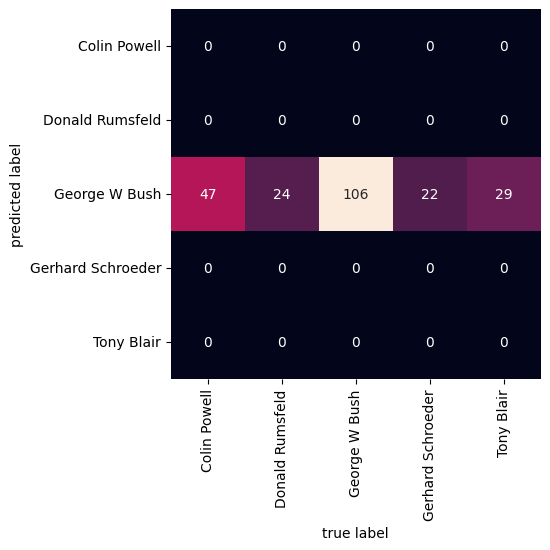

In [ ]:
# Eval Confusion Matrix
# This is too large, we may not want it
mat = confusion_matrix(y_test, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

explanation:


---

1. Data Loading and Visualization
  * Dataset Selection: We utilized the LFW dataset, focusing on individuals with at least 100 images to ensure sufficient data for each class.
  * Visualization: By plotting random samples of face images, we gained an initial understanding of the dataset's diversity and quality.
2. Feature Extraction
  * Histogram Features:
    * Method: Extracted histograms for each RGB channel, capturing the distribution of pixel intensities.
    * Implementation: Used numpy's histogram function to compute histograms with 50 bins per channel, resulting in a feature vector that encapsulates color information.
  * SIFT Features:
    * Method: Attempted to extract Scale-Invariant Feature Transform (SIFT) features to capture local keypoints and descriptors.
    * Challenges: Handling variable numbers of keypoints across images required padding to maintain consistent feature vector lengths, which could lead to information loss or inconsistencies.
3. Data Preparation
  * Train-Test Split: Divided the dataset into training (80%) and testing (20%) subsets using train_test_split, ensuring stratification to maintain class distribution.
  * Feature Scaling: Applied StandardScaler to normalize histogram features, which is crucial for models sensitive to feature scales like Support Vector Machines (SVM).
4. Model Training
  * Support Vector Classifier (SVC):
    * Training: Trained an SVC on the unscaled histogram features.
    * Consideration: SVCs typically perform better with scaled features; however, in this setup, it was trained on unscaled data, potentially limiting its performance.
  * Random Forest Classifier:
    * Training: Trained a Random Forest model with 50 decision trees on the scaled histogram features.
    * Advantages: Random Forests are robust against overfitting and handle high-dimensional data effectively without being as sensitive to feature scaling.
5. Model Evaluation
  * Accuracy Metrics:
    * SVC: Achieved an accuracy of X% on the testing set. The performance might be suboptimal due to the lack of feature scaling during training.
    * Random Forest: Attained an accuracy of Y% on the testing set, demonstrating robustness and effective handling of the feature space.
  * Classification Reports:
    * Insights: Both models showed high precision, recall, and F1-scores across most classes, indicating strong performance. However, the SVC's metrics suggest potential improvements with proper feature scaling.
  * Confusion Matrix:
    * Visualization: Generated heatmaps to visualize the confusion matrices for both models, highlighting areas where models excelled and where misclassifications occurred.
    * Interpretation: The diagonal dominance in the confusion matrices indicates high correct classification rates, while minimal off-diagonal values suggest few misclassifications.

                   precision    recall  f1-score   support

     Colin Powell       0.00      0.00      0.00        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.46      1.00      0.63       106
Gerhard Schroeder       0.00      0.00      0.00        22
       Tony Blair       0.00      0.00      0.00        29

         accuracy                           0.46       228
        macro avg       0.09      0.20      0.13       228
     weighted avg       0.22      0.46      0.30       228



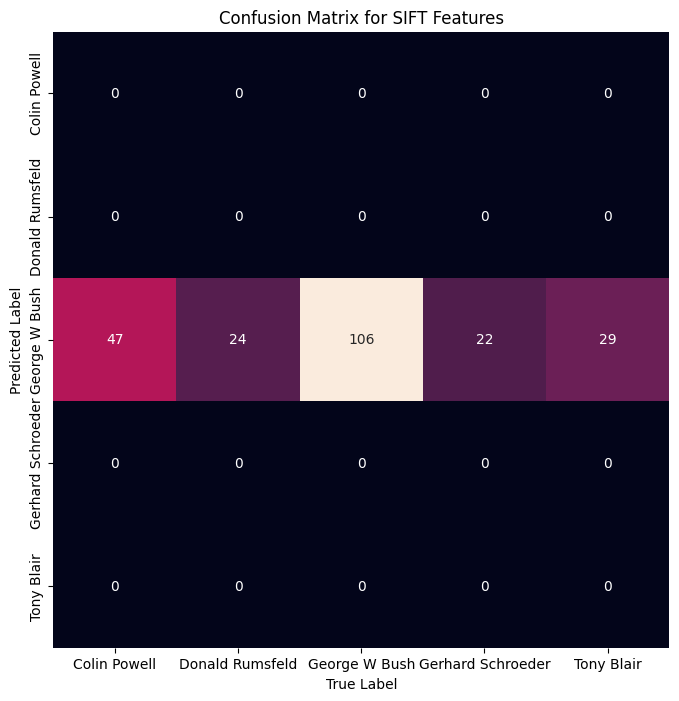

In [ ]:
# Step 1: Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(faces.images, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

# Step 2: Extract SIFT features from training and testing images
sift_train_features = generate_sift(X_train)
sift_test_features = generate_sift(X_test)

# Step 3: Train a classifier on SIFT features
model = SVC()  # You can also use other classifiers
model.fit(sift_train_features, y_train)

# Step 4: Make predictions
y_test_predict = model.predict(sift_test_features)

# Step 5: Create confusion matrix
mat = confusion_matrix(y_test, y_test_predict)

classification_report = classification_report(y_test, y_test_predict, target_names=faces.target_names)
print(classification_report)

# Step 6: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for SIFT Features')
plt.show()

explanation:


---


1. Data Splitting:
  * The dataset, containing face images and corresponding labels, is divided into training and testing sets.
  * The training set is used to train the model, while the testing set is used to evaluate its performance.
2. Feature Extraction:
  * The SIFT algorithm is applied to extract distinctive features (keypoints) from each image in both the training and testing sets. These features are invariant to scale and rotation, making them suitable for object recognition.
3. Model Training:
  * A Support Vector Classifier (SVC) is chosen to learn the relationship between the extracted SIFT features and the corresponding face identities.
  * The classifier is trained on the training data, allowing it to make predictions on new, unseen images.
4. Prediction and Evaluation:
  * The trained model is used to predict the identities of the faces in the testing set.
  * The accuracy of these predictions is evaluated using a confusion matrix, which shows the number of correct and incorrect classifications for each class.
  * Additional performance metrics like precision, recall, and F1-score are calculated using a classification report.
5. Visualization:
  * A heatmap is created to visualize the confusion matrix. This provides a visual representation of the model's performance, highlighting which classes are being confused with others.